In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from drawdata import ScatterWidget

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim

plt.style.use('dark_background')

In [2]:
widget = ScatterWidget()
widget

ScatterWidget()

In [3]:
raw_dataset = widget.data_as_pandas

In [4]:
data = raw_dataset[['x', 'y']]

In [5]:
def predict(model, X):
    model.eval()
    with torch.no_grad():
        return model(X).numpy()

In [6]:
data.head()

,x,y
0,64.434157,39.016228
1,77.589837,49.054030
2,82.601901,70.303648
3,64.260022,61.728457
4,91.312994,46.838866


<Axes: xlabel='x', ylabel='y'>

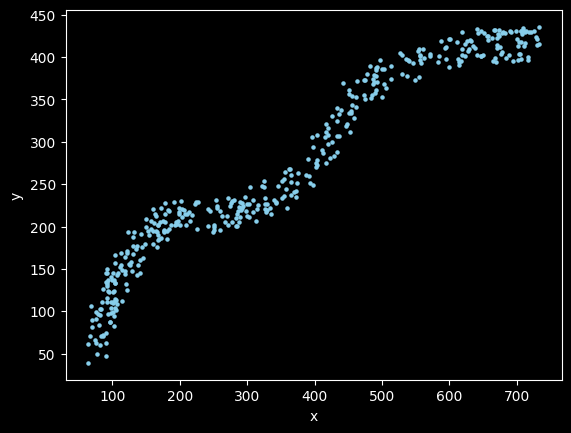

In [9]:
data.plot.scatter(x='x', y='y', marker='.', color='skyblue')

In [10]:
X = torch.tensor(data[['x']].to_numpy(), dtype=torch.float)
y = torch.tensor(data[['y']].to_numpy(), dtype=torch.float)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, len(dataset))

Epoch 1/100: Loss = 84,132.8906
Epoch 2/100: Loss = 58,072.5508
Epoch 3/100: Loss = 26,444.4336
Epoch 4/100: Loss = 17,560.2246
Epoch 5/100: Loss = 14,361.9072
Epoch 6/100: Loss = 13,210.5137
Epoch 7/100: Loss = 12,796.0117
Epoch 8/100: Loss = 12,646.7910
Epoch 9/100: Loss = 12,593.0723
Epoch 10/100: Loss = 12,573.7324
Epoch 11/100: Loss = 12,566.7705
Epoch 12/100: Loss = 12,564.2666
Epoch 13/100: Loss = 12,563.3623
Epoch 14/100: Loss = 12,563.0371
Epoch 15/100: Loss = 12,562.9209
Epoch 16/100: Loss = 12,562.8799
Epoch 17/100: Loss = 12,562.8633
Epoch 18/100: Loss = 12,562.8584
Epoch 19/100: Loss = 12,562.8564
Epoch 20/100: Loss = 12,562.8545
Epoch 21/100: Loss = 12,562.8545
Epoch 22/100: Loss = 12,562.8545
Epoch 23/100: Loss = 12,562.8545
Epoch 24/100: Loss = 12,562.8545
Epoch 25/100: Loss = 12,562.8545
Epoch 26/100: Loss = 12,562.8545
Epoch 27/100: Loss = 12,562.8545
Epoch 28/100: Loss = 12,562.8535
Epoch 29/100: Loss = 12,562.8535
Epoch 30/100: Loss = 12,562.8535
Epoch 31/100: Loss 

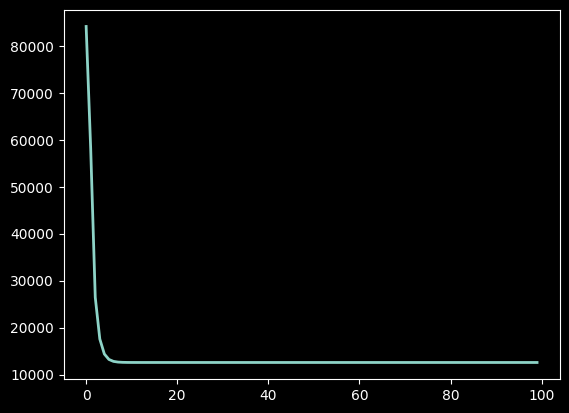

In [22]:
model = nn.Sequential(
    nn.Linear(1, 3),
    nn.Sigmoid(),
    nn.Linear(3, 1),
)


criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 100

losses = []
for epoch in range(1, epochs + 1):
    cost = 0
    model.train()
    for x, y in dataloader:
        yhat = model(x)
        optimizer.zero_grad()
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        
        cost += loss.item()
        
    cost /= len(dataloader)
    losses.append(cost)
    print(f"Epoch {epoch}/{epochs}: Loss = {cost:,.4f}")


plt.plot(losses, linewidth=2, )

12562.85491328481


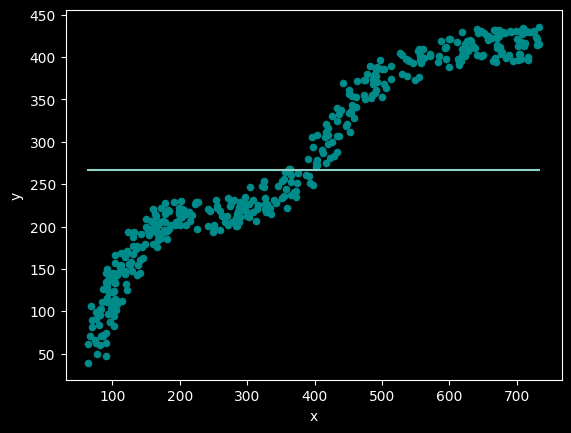

In [23]:
y_pred = predict(model, X)

print(mean_squared_error(data['y'], y_pred))

data.plot.scatter(x='x', y='y', color='darkcyan')

plt.plot(data['x'], y_pred)